# Multi-layer Perceptron (MLP)

O Multi-layer Perceptron (MLP) é uma classe de redes neurais artificiais que consiste em múltiplas camadas de neurônios, incluindo uma camada de entrada, uma ou mais camadas ocultas e uma camada de saída. Cada neurônio em uma camada está conectado a todos os neurônios na camada subsequente, formando uma arquitetura de rede feedforward.

## Arquitetura:
- **Camada de Entrada:** Recebe os dados de entrada e repassa para a primeira camada oculta.

- **Camadas Ocultas:** Consistem em neurônios que aplicam transformações lineares e não lineares aos dados de entrada. Cada neurônio recebe entradas ponderadas das camadas anteriores, aplica uma função de ativação e passa o resultado para a próxima camada.

- **Camada de Saída:** Gera as previsões finais. A estrutura e o número de neurônios nesta camada dependem do tipo de problema (classificação, regressão, etc.).

## Funções de Ativação:
As funções de ativação são usadas em cada neurônio para introduzir não linearidades na rede, permitindo que ela aprenda padrões complexos nos dados. Aqui estão algumas das funções de ativação comumente usadas:

- **Linear:** $f(x) = x$
    - A função linear é simplesmente uma função identidade que retorna a entrada sem modificação. Ela é usada principalmente na camada de saída para problemas de regressão.

- **Logística (Sigmoid):** $f(x) = \frac{1}{1 + e^{-x}}$
    - A função logística (ou sigmoid) mapeia os valores de entrada para o intervalo [0, 1]. É útil em problemas de classificação binária, onde a saída representa a probabilidade de pertencer a uma classe.

- **Tangente Hiperbólica (Tanh):** $f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$
    - A função tangente hiperbólica (tanh) é semelhante à função sigmoid, mas mapeia os valores de entrada para o intervalo [-1, 1]. Ela é frequentemente usada em camadas ocultas de redes neurais.

- **ReLU (Rectified Linear Unit):** $f(x) = \max(0, x)$
    - A função ReLU é uma função de ativação não linear que retorna zero para valores negativos e a entrada para valores positivos. Ela é amplamente usada em camadas ocultas de redes neurais devido à sua simplicidade e eficácia.

## Treinamento:
O treinamento de um MLP envolve a atualização iterativa dos pesos das conexões entre os neurônios para minimizar uma função de perda (loss function) que quantifica o erro entre as previsões do modelo e os rótulos reais. Isso é geralmente feito utilizando técnicas de otimização, como o gradiente descendente e suas variantes.

## Implementação no scikit-learn:
O MLPClassifier do scikit-learn é uma implementação eficiente e fácil de usar de um MLP para tarefas de classificação. Ele permite configurar a arquitetura da rede, incluindo o número de camadas e neurônios, as funções de ativação, o algoritmo de otimização e outros hiperparâmetros.

Importando bibliotecas

In [1]:
import gsidiag as gd
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np

In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPClassifier

from itertools import combinations
import seaborn as sns


Definindo parâmetros para o uso do readDiag

In [3]:
DIRdiag = "/home/patrick/readDiag/data"

varName = "amsua"
varType = "n15"
dateIni="2020010100" 
dateFin="2020010106" 
nHour = "6"          
vminOMA = -2.0       
vmaxOMA = 2.0        
vminSTD = 0.0        
vmaxSTD = 14.0       
Level = 1000
Lay = None           
SingleL = "All" 

datei = datetime.strptime(str(dateIni), "%Y%m%d%H")
datef = datetime.strptime(str(dateFin), "%Y%m%d%H")
dates = [dates.strftime('%Y%m%d%H') for dates in pd.date_range(datei, datef,freq="6H").tolist()]

print(dates)


['2020010100', '2020010106']


Encontrando e listando arquivos para serem usados

In [4]:
paths, pathsc = [], []

OuterL = "01"        
[paths.append(DIRdiag+"/"+dt+"/diag_amsua_n15_"+OuterL+"."+dt) for dt in dates]

OuterLc = "03"
[pathsc.append(DIRdiag+"/"+dt+"/diag_amsua_n15_"+OuterLc+"."+dt) for dt in dates]

print(paths)
print("")
print(pathsc)

['/home/patrick/readDiag/data/2020010100/diag_amsua_n15_01.2020010100', '/home/patrick/readDiag/data/2020010106/diag_amsua_n15_01.2020010106']

['/home/patrick/readDiag/data/2020010100/diag_amsua_n15_03.2020010100', '/home/patrick/readDiag/data/2020010106/diag_amsua_n15_03.2020010106']


Lendo arquivos listado usando o readDiag e concatenando os dados

In [5]:
# Define uma variável booleana 'read' como True para indicar que a leitura dos arquivos será realizada
read = True

# Verifica se 'read' é True para prosseguir com a leitura dos arquivos
if read:        
    # Inicializa uma lista vazia para armazenar os objetos gdf
    gdf_list = []
    # Imprime uma mensagem informando o tempo estimado necessário para a leitura dos arquivos
    print("")
    print("Aguarde, o tempo total estimado para a leitura dos arquivos é de "+
          str(int((float(len(paths))*20 )/60))+" minutos e "+
          str(int((float(len(paths))*20 )%60))+" segundos.")
    print("")
    # Itera sobre os caminhos dos arquivos e seus caminhos de configuração correspondentes
    for path, pathc in zip(paths,pathsc):
        # Imprime uma mensagem indicando o arquivo que está sendo lido
        print("Reading "+path)
        # Lê o arquivo usando a função read_diag do módulo gsidiag e armazena o objeto retornado em gdf
        gdf = gd.read_diag(path,pathc)
        # Adiciona o objeto gdf à lista gdf_list
        gdf_list.append(gdf)

    # Imprime a lista de objetos gdf lidos
    print(gdf_list)
    
    # Define uma string separadora para uso posterior
    separator = " ====================================================================================================="



Aguarde, o tempo total estimado para a leitura dos arquivos é de 0 minutos e 40 segundos.

Reading /home/patrick/readDiag/data/2020010100/diag_amsua_n15_01.2020010100
 
>>> GSI DIAG <<<
 
Reading /home/patrick/readDiag/data/2020010106/diag_amsua_n15_01.2020010106
 
>>> GSI DIAG <<<
 
[<gsidiag.__main__.read_diag object at 0x7f6f7c772f90>, <gsidiag.__main__.read_diag object at 0x7f6f842d0950>]


Definição da função para discretizar os dados de impacto:

In [6]:
# Função que retorna a categoria:
def categoria_de(valorRF):
    categoria = None
    if valorRF <= -0.25:
        categoria = "Impacto negativo alto"
    elif valorRF > -0.25 and valorRF < 0:
        categoria = "Impacto negativo baixo"
    elif valorRF == 0:
        categoria = "Impacto neutro"
    elif valorRF > 0 and valorRF < 0.25:
        categoria = "Impacto positivo baixo"
    elif valorRF >= 0.25:
        categoria = "Impacto positivo alto"
    return categoria

In [7]:
def MatrizConfusao(YTEST, YPRED, CLASSES, TIPO):
    # Computa a matriz de confusão
    matriz_confusao = confusion_matrix(YTEST, YPRED)

    # Imprime a matriz de confusão
    print(f"Matriz de Confusão para {TIPO}:")
    print(matriz_confusao)

    # Calcula a soma de cada linha da matriz de confusão
    sum_by_class = np.sum(matriz_confusao, axis=1)

    # Normaliza a matriz de confusão
    matriz_confusao_normalized = matriz_confusao / sum_by_class[:, np.newaxis]

    # Plota a matriz de confusão normalizada
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_confusao_normalized, annot=True, fmt=".3f", 
                cmap="Blues", xticklabels=CLASSES, yticklabels=CLASSES)
    plt.title(f"Matriz de Confusão - {TIPO}")
    plt.xlabel("Valor Previsto")
    plt.ylabel("Valor Real")
    plt.savefig(f"MatrizConfusao_{TIPO}.png", facecolor='white')
    plt.show()
    
    print("Função MatrizConfusao concluído")

In [8]:
# Inicialização de DataFrame vazio para armazenar dados concatenados
df_concatenado2 = pd.DataFrame()

# Iteração sobre objetos em gdf_list
for objeto in gdf_list:
        
    print("Separando dados do arquivo" + str(objeto._diagFile))
    print(separator) 
        
    # Criação de dicionário de dados a partir do objeto
    dados_dict = {
            'lat': objeto.obsInfo[varName].loc[varType].lat,
            'lon': objeto.obsInfo[varName].loc[varType].lon,
            'elev': objeto.obsInfo[varName].loc[varType].elev,
            'nchan': objeto.obsInfo[varName].loc[varType].nchan,
            'time': objeto.obsInfo[varName].loc[varType].time,
            'iuse': objeto.obsInfo[varName].loc[varType].iuse,
            'idqc': objeto.obsInfo[varName].loc[varType].idqc,
            'inverr': objeto.obsInfo[varName].loc[varType].inverr,
            'oer': objeto.obsInfo[varName].loc[varType].oer,
            'obs': objeto.obsInfo[varName].loc[varType].obs,
            'omf': objeto.obsInfo[varName].loc[varType].omf,
            'omf_nobc': objeto.obsInfo[varName].loc[varType].omf_nobc,
            'emiss': objeto.obsInfo[varName].loc[varType].emiss,
            'oma': objeto.obsInfo[varName].loc[varType].oma,
            'oma_nobc': objeto.obsInfo[varName].loc[varType].oma_nobc,
            'imp': objeto.obsInfo[varName].loc[varType].imp,
            'dfs': objeto.obsInfo[varName].loc[varType].dfs
            }
        
    # Conversão do dicionário em DataFrame
    df_objeto = pd.DataFrame(dados_dict)
    
    # Aplicação da função 'categoria_de' para criar a coluna 'imp_categ'
    df_objeto['imp_categ'] = df_objeto['imp'].apply(categoria_de)
        
    # Concatenação do DataFrame do objeto com o DataFrame concatenado
    df_concatenado2 = pd.concat([df_concatenado2, df_objeto], ignore_index=True)
    

Separando dados do arquivo/home/patrick/readDiag/data/2020010100/diag_amsua_n15_01.2020010100
Separando dados do arquivo/home/patrick/readDiag/data/2020010106/diag_amsua_n15_01.2020010106


In [9]:
# Remoção de linhas com valores NaN
df_concatenado2.dropna(inplace=True)
    
# Filtrando os canais sub-representados
df_concatenado2 = df_concatenado2[~df_concatenado2['nchan'].isin([1, 2, 3, 4, 5, 15])]

print(df_concatenado2)

print(separator)
    
# Lista de atributos a serem usados para treinamento
atributos = ['omf', 'oma', 'dfs', 'imp']

# Define as classes para a matriz de confusão
classes = ['6','7','8','9','10','12','13']

# Divisão dos dados em conjuntos de treinamento e teste
X = df_concatenado2[atributos]
y = df_concatenado2['nchan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
print('Treino e Teste prontos')
print(separator)

              lat         lon         elev  nchan      time  iuse  idqc  \
5      -87.504501   19.704599  2735.045410    6.0  0.315833  -1.0  -0.0   
6      -87.504501   19.704599  2735.045410    7.0  0.315833   1.0   0.0   
7      -87.504501   19.704599  2735.045410    8.0  0.315833   1.0   0.0   
8      -87.504501   19.704599  2735.045410    9.0  0.315833   1.0   0.0   
9      -87.504501   19.704599  2735.045410   10.0  0.315833   1.0   0.0   
...           ...         ...          ...    ...       ...   ...   ...   
209947  77.502502  358.795105    -0.108379    8.0  1.952778   1.0   0.0   
209948  77.502502  358.795105    -0.108379    9.0  1.952778   1.0   0.0   
209949  77.502502  358.795105    -0.108379   10.0  1.952778   1.0   0.0   
209951  77.502502  358.795105    -0.108379   12.0  1.952778   1.0   0.0   
209952  77.502502  358.795105    -0.108379   13.0  1.952778   1.0   0.0   

          inverr       oer         obs       omf  omf_nobc     emiss  \
5       3.557238  0.281441 

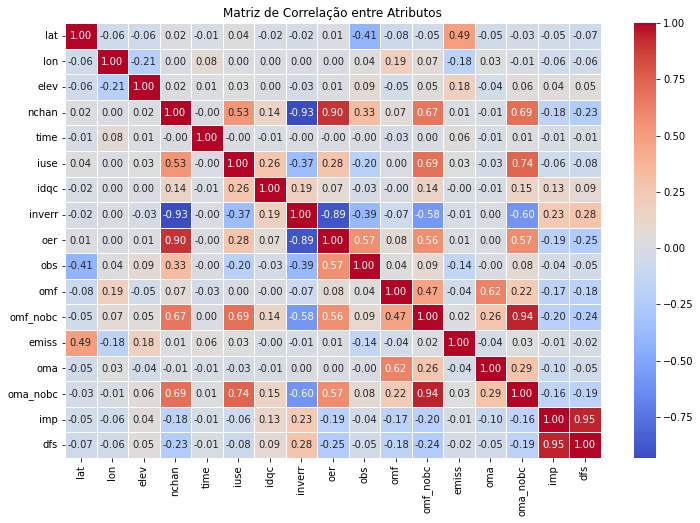

In [10]:
# Calcular a matriz de correlação
correlation_matrix = df_concatenado2.corr()

# Plotar a matriz de correlação usando um heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação entre Atributos')
plt.show()

/home/patrick/anaconda3/envs/readDiag/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Acurácia: <function accuracy_score at 0x7f6f7cc6d5f0>
Matriz de Confusão:
[[2060  127   23   27   18    1    0]
 [ 360 2312   88   30   14    0    0]
 [  77   78 2607   57   28    0    0]
 [  39   20   36 2673   75    0    0]
 [  20   11    4   67 2723    0    3]
 [   2    2    0    0   28 2693   16]
 [   8    2    0    0    9   35 2722]]


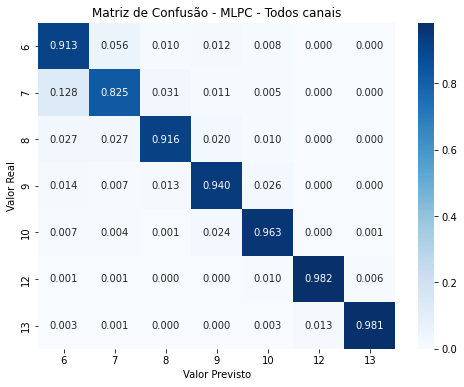


Relatório de Classificação:
              precision    recall  f1-score   support

         6.0       0.80      0.91      0.85      2256
         7.0       0.91      0.82      0.86      2804
         8.0       0.95      0.92      0.93      2847
         9.0       0.94      0.94      0.94      2843
        10.0       0.94      0.96      0.95      2828
        12.0       0.99      0.98      0.98      2741
        13.0       0.99      0.98      0.99      2776

    accuracy                           0.93     19095
   macro avg       0.93      0.93      0.93     19095
weighted avg       0.93      0.93      0.93     19095



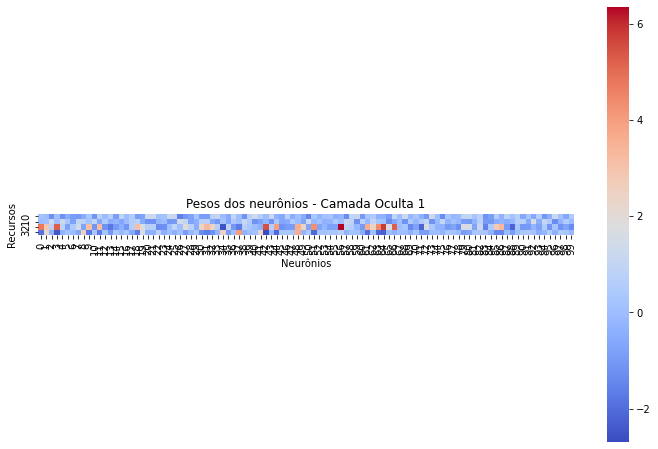

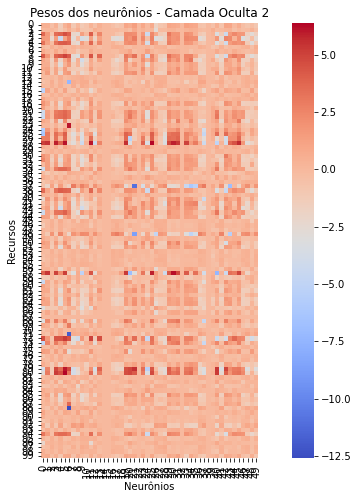

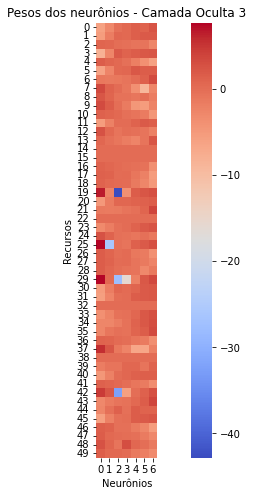

In [11]:
from sklearn.model_selection import learning_curve

# Definição da arquitetura da rede neural usando MLPClassifier
modeloMLPC = MLPClassifier(solver='adam', alpha=1e-5,
                           hidden_layer_sizes=(100, 50), # 2 camadas ocultas, com 100 e 50 neurônios, respectivamente
                           activation='relu', # Função de ativação ReLU
                           random_state=1)
# Treina o modelo de rede neural MLPClassifier com os dados de treinamento
modeloMLPC.fit(X, y)

# Faz previsões usando o modelo treinado nos dados de teste
y_pred = modeloMLPC.predict(X_test)

# Calcula e imprime a acurácia do modelo nos dados de teste
score = modeloMLPC.score(X_test, y_test)
print("Acurácia:", accuracy_score)

# Computa a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

# Imprime a matriz de confusão
print("Matriz de Confusão:")
print(matriz_confusao)

# Calcula a soma de cada linha da matriz de confusão
sum_by_class = np.sum(matriz_confusao, axis=1)

# Normaliza a matriz de confusão
matriz_confusao_normalized = matriz_confusao / sum_by_class[:, np.newaxis]

# Plota a matriz de confusão normalizada
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_normalized, annot=True, fmt=".3f", 
            cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Matriz de Confusão - MLPC - Todos canais")
plt.xlabel("Valor Previsto")
plt.ylabel("Valor Real")
plt.savefig("MatrizConfusao_All_Ch.png", facecolor='white')
plt.show()

# Gera e imprime o relatório de classificação, que inclui métricas como precisão, recall e F1-score
relatorio_classificacao = classification_report(y_test, y_pred)
print(f"\nRelatório de Classificação:")
print(relatorio_classificacao)

# Calcula e visualiza os pesos dos neurônios
pesos_camadas_ocultas = [pesos_camada for pesos_camada in modeloMLPC.coefs_ if len(pesos_camada) > 0]
for i, pesos_camada in enumerate(pesos_camadas_ocultas):
    plt.figure(figsize=(12, 8))
    plt.title(f"Pesos dos neurônios - Camada Oculta {i+1}")
    sns.heatmap(pesos_camada, annot=False, cmap="coolwarm", xticklabels=True, yticklabels=True)
    plt.xlabel("Neurônios")
    plt.ylabel("Recursos")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.savefig(f"Pesos_Neuronios_Camada_Oculta_{i+1}.png", facecolor='white', bbox_inches='tight')
    plt.show()
  

In [12]:
# Lista de atributos a serem usados para treinamento
atributos = ['lat','lon','elev','time','iuse',
             'idqc','inverr','oer','obs','omf','omf_nobc',
             'emiss','oma','oma_nobc','imp','dfs']

# Define as classes para a matriz de confusão
classes = ['6','7','8','9','10','12','13']

# Divisão dos dados em conjuntos de treinamento e teste
X = df_concatenado2[atributos]
y = df_concatenado2['nchan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
print('Treino e Teste prontos')
print(separator)

Treino e Teste prontos


Acurácia: <function accuracy_score at 0x7f6f7cc6d5f0>
Matriz de Confusão:
[[2254    0    0    1    0    1    0]
 [   0 2729   69    6    0    0    0]
 [   0    2 2843    2    0    0    0]
 [   0    0    1 2834    8    0    0]
 [   0    0    0    0 2828    0    0]
 [   0    0    0    0    0 2741    0]
 [   0    0    0    0    0    0 2776]]


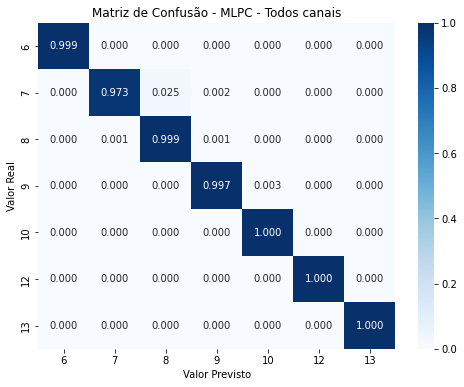


Relatório de Classificação:
              precision    recall  f1-score   support

         6.0       1.00      1.00      1.00      2256
         7.0       1.00      0.97      0.99      2804
         8.0       0.98      1.00      0.99      2847
         9.0       1.00      1.00      1.00      2843
        10.0       1.00      1.00      1.00      2828
        12.0       1.00      1.00      1.00      2741
        13.0       1.00      1.00      1.00      2776

    accuracy                           1.00     19095
   macro avg       1.00      1.00      1.00     19095
weighted avg       1.00      1.00      1.00     19095



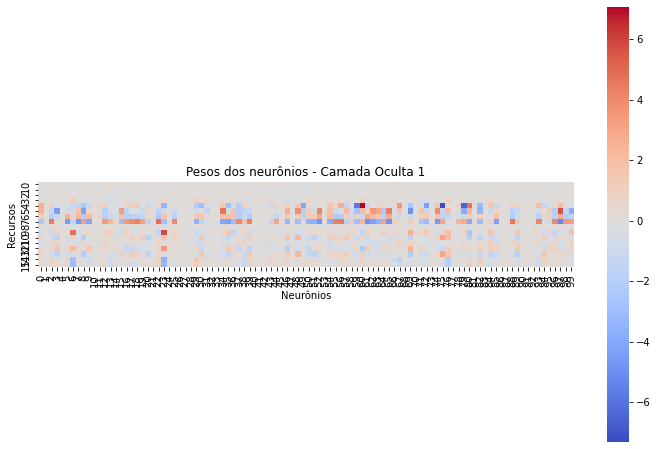

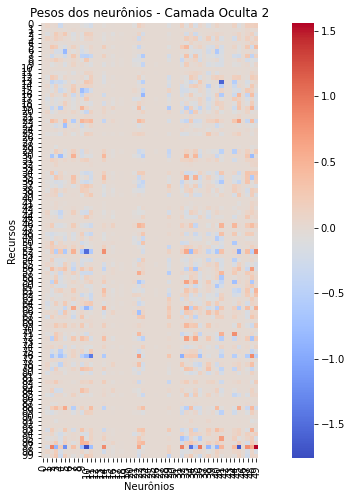

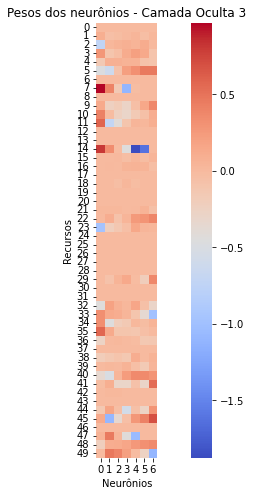

In [13]:
from sklearn.model_selection import learning_curve

# Definição da arquitetura da rede neural usando MLPClassifier
modeloMLPC = MLPClassifier(solver='adam', alpha=1e-5,
                           hidden_layer_sizes=(100, 50), # 2 camadas ocultas, com 100 e 50 neurônios, respectivamente
                           activation='relu', # Função de ativação ReLU
                           random_state=1)
# Treina o modelo de rede neural MLPClassifier com os dados de treinamento
modeloMLPC.fit(X, y)

# Faz previsões usando o modelo treinado nos dados de teste
y_pred = modeloMLPC.predict(X_test)

# Calcula e imprime a acurácia do modelo nos dados de teste
score = modeloMLPC.score(X_test, y_test)
print("Acurácia:", accuracy_score)

# Computa a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

# Imprime a matriz de confusão
print("Matriz de Confusão:")
print(matriz_confusao)

# Calcula a soma de cada linha da matriz de confusão
sum_by_class = np.sum(matriz_confusao, axis=1)

# Normaliza a matriz de confusão
matriz_confusao_normalized = matriz_confusao / sum_by_class[:, np.newaxis]

# Plota a matriz de confusão normalizada
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_normalized, annot=True, fmt=".3f", 
            cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Matriz de Confusão - MLPC - Todos canais")
plt.xlabel("Valor Previsto")
plt.ylabel("Valor Real")
plt.savefig("MatrizConfusao_All_Ch.png", facecolor='white')
plt.show()

# Gera e imprime o relatório de classificação, que inclui métricas como precisão, recall e F1-score
relatorio_classificacao = classification_report(y_test, y_pred)
print(f"\nRelatório de Classificação:")
print(relatorio_classificacao)

# Calcula e visualiza os pesos dos neurônios
pesos_camadas_ocultas = [pesos_camada for pesos_camada in modeloMLPC.coefs_ if len(pesos_camada) > 0]
for i, pesos_camada in enumerate(pesos_camadas_ocultas):
    plt.figure(figsize=(12, 8))
    plt.title(f"Pesos dos neurônios - Camada Oculta {i+1}")
    sns.heatmap(pesos_camada, annot=False, cmap="coolwarm", xticklabels=True, yticklabels=True)
    plt.xlabel("Neurônios")
    plt.ylabel("Recursos")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.savefig(f"Pesos_Neuronios_Camada_Oculta_{i+1}.png", facecolor='white', bbox_inches='tight')
    plt.show()
  